In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("./data/vwcars.csv") 

df["logprice"] = np.log(df["price"])
df["lp100"] = 282.48 / df["mpg"]
df["age"] = 2021 - df["year"]

In [3]:
# metric descriptives:
df.describe()

,price,year,mileage,mpg,engineSize,tax,logprice,lp100,age
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,14.682285,2017.212329,25.106171,58.724201,1.473744,96.803653,2.541854,5.108284,3.787671
std,7.745461,1.955602,25.037824,17.748425,0.423098,61.650174,0.548676,1.191943,1.955602
min,3.495000,2006.000000,1.201000,32.500000,1.000000,0.000000,1.251333,1.701687,1.000000
25%,7.781000,2016.000000,6.053500,50.400000,1.000000,20.000000,2.051684,4.400000,2.000000
50%,11.999000,2017.000000,17.526000,60.100000,1.500000,145.000000,2.484823,4.700166,4.000000
75%,20.990000,2019.000000,33.368000,64.200000,2.000000,145.000000,3.044046,5.604762,5.000000
max,38.990000,2020.000000,138.570000,166.000000,2.000000,265.000000,3.663305,8.691692,15.000000


In [4]:
df.groupby("fuelType").count()

,price,model,year,mileage,mpg,engineSize,tax,transmission,logprice,lp100,age
fuelType,,,,,,,,,,,
Diesel,169,169,169,169,169,169,169,169,169,169,169
Hybrid,13,13,13,13,13,13,13,13,13,13,13
Petrol,256,256,256,256,256,256,256,256,256,256,256


In [5]:
df.groupby("model").count()

,price,year,mileage,mpg,fuelType,engineSize,tax,transmission,logprice,lp100,age
model,,,,,,,,,,,
Passat,161,161,161,161,161,161,161,161,161,161,161
T-Roc,127,127,127,127,127,127,127,127,127,127,127
Up,150,150,150,150,150,150,150,150,150,150,150


In [6]:
df.groupby("transmission").count()

,price,model,year,mileage,mpg,fuelType,engineSize,tax,logprice,lp100,age
transmission,,,,,,,,,,,
Automatic,52,52,52,52,52,52,52,52,52,52,52
Manual,320,320,320,320,320,320,320,320,320,320,320
Semi-Auto,66,66,66,66,66,66,66,66,66,66,66


In [12]:
# compute dummy variables:
# Passat, Manual and Diesel as base categories
df["model_T-Roc"] = df["model"].apply(lambda x: 1 if x == "T-Roc" else 0)
df["model_Up"] = df["model"].apply(lambda x: 1 if x == "Up" else 0)

df["fuelType_Petrol"] = df["fuelType"].apply(lambda x: 1 if x == "Petrol" else 0)
df["fuelType_Hybrid"] = df["fuelType"].apply(lambda x: 1 if x == "Hybrid" else 0)

df["transmission_Automatic"] = df["transmission"].apply(lambda x: 1 if x == "Automatic" else 0)
df["transmission_Semi-Auto"] = df["transmission"].apply(lambda x: 1 if x == "Semi-Auto" else 0)

df

,price,model,year,mileage,mpg,fuelType,engineSize,tax,transmission,logprice,lp100,age,model_T-Roc,model_Up,fuelType_Petrol,fuelType_Hybrid,transmission_Automatic,transmission_Semi-Auto
0,22.972,Passat,2018,56.955,166.0,Hybrid,1.4,135,Semi-Auto,3.134276,1.701687,3,0,0,0,1,0,1
1,8.590,Passat,2015,62.459,70.6,Diesel,1.6,20,Manual,2.150599,4.001133,6,0,0,0,0,0,0
2,19.750,Passat,2019,4.116,45.6,Petrol,1.5,145,Manual,2.983153,6.194737,2,0,0,1,0,0,0
3,28.000,Passat,2019,5.530,43.5,Hybrid,1.4,135,Semi-Auto,3.332205,6.493793,2,0,0,0,1,0,1
4,10.890,Passat,2016,62.162,68.9,Diesel,2.0,20,Manual,2.387845,4.099855,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,6.800,Up,2017,20.000,64.2,Petrol,1.0,145,Manual,1.916923,4.400000,4,0,1,1,0,0,0
434,7.800,Up,2017,16.700,60.1,Petrol,1.0,145,Manual,2.054124,4.700166,4,0,1,1,0,0,0
435,9.900,Up,2019,5.000,54.3,Petrol,1.0,145,Manual,2.292535,5.202210,2,0,1,1,0,0,0
436,6.562,Up,2017,42.998,64.2,Petrol,1.0,145,Manual,1.881295,4.400000,4,0,1,1,0,0,0


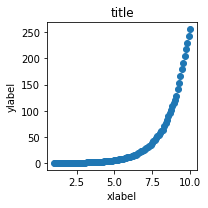

In [38]:
# some functions used later:

def qqplot(arrx, arry,  title = "title", xlabel = "xlabel",ylabel = "ylabel", savepath = "", quantilecount= 100, linelimit=-1):
    quantilesx= []
    quantilesy = []
    for i in range(quantilecount+1):
        q = i/quantilecount
        quantilesx.append(stats.norm.ppf(q) if (type(arrx) is type(None)) else np.quantile(arrx,q))
        quantilesy.append(stats.norm.ppf(q) if (type(arry) is type(None)) else np.quantile(arry,q))
    fig, ax = plt.subplots()
    fig.set_size_inches(3, 3)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    #plt.axis('scaled')
    plt.tight_layout()
    plt.scatter(x= quantilesx, y=quantilesy)
    if(linelimit >0):
        plt.plot([-linelimit,linelimit],[-linelimit,linelimit])
  
    if(savepath != ""):
        fig.savefig(savepath, format='png', dpi=300)
    plt.show()

# example:
qqplot([1,2,3,10,4,5,6,7,8,9], [0.25,0.5,4,8,16,32,64,128,256,1,2])


def scatter(arrx, arry,  title = "title", xlabel = "xlabel",ylabel = "ylabel", savepath = ""):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 3)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.tight_layout()
    plt.scatter(arrx, arry)
    if(savepath != ""):
        fig.savefig(savepath, format='png', dpi=300)
    plt.show()


model for price:

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     355.9
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          1.14e-150
Time:                        14:25:58   Log-Likelihood:                -1160.0
No. Observations:                 438   AIC:                             2332.
Df Residuals:                     432   BIC:                             2357.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1921      1.274 

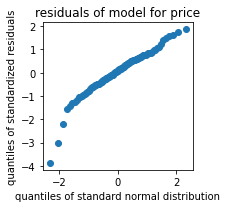

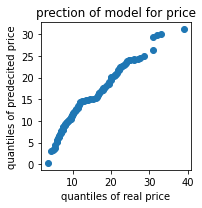

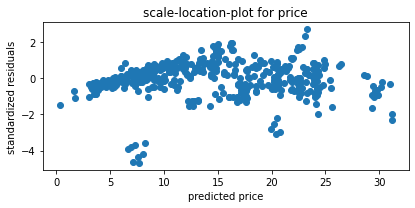


model for logprice:

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     428.8
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          5.77e-165
Time:                        14:25:59   Log-Likelihood:                 32.957
No. Observations:                 438   AIC:                            -53.91
Df Residuals:                     432   BIC:                            -29.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7947      0.0

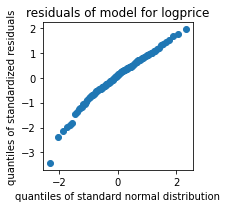

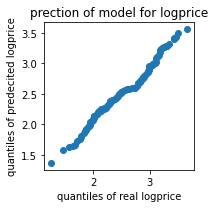

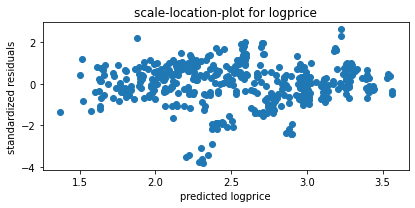

In [40]:
# estimate the two linear models:
ys = ["price","logprice"]

for y in ys:
    modelformula = y + " ~ mileage + engineSize + tax + lp100 + age"
    
    model = ols(modelformula, df).fit()
    dfcopy = df.copy()
    
    dfcopy["yhat"] = model.predict(dfcopy)
    dfcopy["residuals"] = dfcopy["yhat"] - dfcopy[y]
    dfcopy["residuals_z"] = (dfcopy["residuals"] - dfcopy["residuals"].mean())/dfcopy["residuals"].std(ddof=0)
    print("\nmodel for " + y + ":\n")
    # R² and adjusted R²:
    print(model.summary())
    # Q-Q-plot of standardized residuals and a standard normal distribution:
    qqplot(None, dfcopy["residuals_z"], xlabel="quantiles of standard normal distribution", ylabel="quantiles of standardized residuals", title=f"residuals of model for {y}",savepath=f"latex/images/qqplot_resz_{y}.png")
    # Q-Q-plot of y and yhat
    qqplot(dfcopy[y],dfcopy["yhat"], xlabel=f"quantiles of real {y}", ylabel=f"quantiles of predecited {y}", title=f"prection of model for {y}", savepath=f"latex/images/qqplot_yyhat_{y}.png")
    # scale location plot:
    scatter(dfcopy["yhat"], dfcopy["residuals_z"], title=f"scale-location-plot for {y}", xlabel=f"predicted {y}", ylabel=f"standardized residuals", savepath=f"latex/images/scalelocationplot_{y}.png")

In [ ]:
# comparison:
# model with logprice has better R² 0.832 vs 0.805 and all graphs look better

In [ ]:
# best subset selection:
from sympy.utilities.iterables import multiset_combinations
y = "logprice"
vars = ["mileage","engineSize","tax","lp100", "age" ]
allvarcombinations = [None, 
list(multiset_combinations(vars,1)),
list(multiset_combinations(vars,2)),
list(multiset_combinations(vars,3)),
list(multiset_combinations(vars,4)),
list(multiset_combinations(vars,5))]
models = []
# models with one predictor:
print("All Models to consider for Subset selection:")
for i in range(1,6):
    print("\n number of predictors: " + str(i) + "\n")
    combs = allvarcombinations[i]
    for c in combs:
        modelformula = y + " ~ " + " + ".join(c)
        models.append({"i": i, "formula": modelformula, "model": None})
        print(modelformula)


In [ ]:
# calulate models:
for m in models:
    mod = ols(m["formula"], df).fit()
    m["model"] = mod
    m["AIC"] = m["model"].aic
    m["BIC"]= m["model"].bic
print(models)

In [ ]:
# select best model for each number of predictors:
bestmodelsBIC = [None]*6
bestmodelsAIC =  [None]*6
for i in range(1,6):
    imodels = list(filter(lambda m: m["i"] == i,models))
    bicmin = 100000000000
    aicmin = 100000000000
    for m in imodels:
        if(m["AIC"] < aicmin):
            aicmin = m["AIC"]
            bestmodelsAIC[i] = m
        if(m["BIC"] < bicmin):
            bicmin = m["BIC"]
            bestmodelsBIC[i] = m
        
print("Models suggested by AIC")
print([m["AIC"] if m != None else "" for m in bestmodelsAIC])
print("Models suggested by BIC")
print([m["BIC"] if m != None else "" for m in bestmodelsBIC])

# as expected both AIC and BIC give the same models for each number of predictors.
# they are:

"""

AICS: ['', 358.5234128593049, 58.46063583089153, -25.641701463431446, -48.1132671600119, -53.914542564533576]
BICS: ['', 366.6878506800578, 70.70729256202087, -9.31282582192566, -27.70217260812967, -29.4212291022749]

logprice ~ age
logprice ~ age + engineSize
logprice ~ age + engineSize + mileage
logprice ~ age + engineSize + mileage + lp100 
logprice ~ age + engineSize + mileage + lp100 + tax

"""  

# best model is the model with the 3 predictors, according to AIC and BIC


In [ ]:
# best model:

model = ols("logprice ~ age + engineSize + mileage", df)
modelfit = model.fit()

"""
model parameters:
                coef	std err	t	    P>|t|	[0.025	0.975]
Intercept	    2.1756	0.053	41.201	0.000	2.072	2.279
age	            -0.1410	0.008	-17.734	0.000	-0.157	-0.125
engineSize	    0.7152	0.029	24.874	0.000	0.659	0.772
mileage	        -0.0061	0.001	-9.710	0.000	-0.007	-0.005

"""

print(modelfit.summary())


In [ ]:
from statsmodels.graphics.regressionplots import abline_plot
# prediction plot
y = df["logprice"]
df["logprice_pred"] = modelfit.predict(df)
df["residuals"] = df["logprice_pred"] - df["logprice"]
# scatter-plot regression
ax = df.plot(x='logprice', y='logprice_pred', kind='scatter')
abline_plot(model_results=ols("logprice_pred ~ logprice", df).fit(), ax=ax, color="red")
plt.show()

# scatter-plot residuals

ax = df.plot(x='logprice', y='residuals', kind='scatter')
abline_plot(model_results=ols("residuals ~ logprice", df).fit(), ax=ax, color="red")
plt.show()

# residuals sum up to 0 but are not uncorrelated with logprice. Therefore no good model fit yet.

In [ ]:
# qq plot with normal distribution:
linelimit = 3
quantilecount = 100
quantilesReal = []
quantilesPredicted = []
for i in range(quantilecount+1):
    q = i/quantilecount
    quantilesReal.append((np.quantile(df["logprice"],q)))
    quantilesPredicted.append((np.quantile(df["logprice_pred"],q)))
fig, ax = plt.subplots()
ax.set_xlabel("Quantiles logprice")
ax.set_ylabel("Quantiles logprice_pred")
plt.scatter(x= quantilesReal, y=quantilesPredicted)
plt.plot(quantilesReal, quantilesReal, color="red")
#plt.plot([-linelimit,linelimit],[-linelimit,linelimit])
plt.show()